# Import Log from a csv file

Load the running example and print the first two traces.

In [2]:
from Domain.EventLog import EventLog

log = EventLog()
log.from_csv_file("01/running-example.csv")

for key, trace in list(log.traces.items())[:2]:
    print(f"Trace {key}:")
    for event in trace.events:
        print(f"  • {event.__repr__()}")
    print("\n")

Trace 1:
  • Event({'Case ID': '1', 'Event ID': '35654423', 'Activity': 'register request', 'Resource': 'Pete'})
  • Event({'Case ID': '1', 'Event ID': '35654424', 'Activity': 'examine thoroughly', 'Resource': 'Sue'})
  • Event({'Case ID': '1', 'Event ID': '35654425', 'Activity': 'check ticket', 'Resource': 'Mike'})
  • Event({'Case ID': '1', 'Event ID': '35654426', 'Activity': 'decide', 'Resource': 'Sara'})
  • Event({'Case ID': '1', 'Event ID': '35654427', 'Activity': 'reject request', 'Resource': 'Pete'})


Trace 2:
  • Event({'Case ID': '2', 'Event ID': '35654483', 'Activity': 'register request', 'Resource': 'Mike'})
  • Event({'Case ID': '2', 'Event ID': '35654485', 'Activity': 'check ticket', 'Resource': 'Mike'})
  • Event({'Case ID': '2', 'Event ID': '35654487', 'Activity': 'examine casually', 'Resource': 'Sean'})
  • Event({'Case ID': '2', 'Event ID': '35654488', 'Activity': 'decide', 'Resource': 'Sara'})
  • Event({'Case ID': '2', 'Event ID': '35654489', 'Activity': 'pay compe

## Causal Dependency Matrix

Is Node x connected to node y and in which direction

In [3]:
from DataStructures.CausalDependencyMatrix import CausalDependencyMatrix
import pandas as pd

CausalDependencyMatrix = CausalDependencyMatrix(log)
df = CausalDependencyMatrix.data_frame_representation()
df


,register request,examine thoroughly,check ticket,decide,reject request,examine casually,pay compensation,reinitiate request
register request,,→,→,,,→,,
examine thoroughly,←,,↔,→,,,,←
check ticket,←,↔,,→,,↔,,←
decide,,←,←,,→,←,→,→
reject request,,,,←,,,,
examine casually,←,,↔,→,,,,←
pay compensation,,,,←,,,,
reinitiate request,,→,→,←,,→,,


## Directly follows Matrix

How many times is node X followed by node Y

In [4]:
from DataStructures.DirectlyFollowsMatrix import DirectlyFollowsMatrix
import pandas as pd

DirectlyFollowsMatrix = DirectlyFollowsMatrix(log)
df = DirectlyFollowsMatrix.data_frame_representation()
df


,register request,examine thoroughly,check ticket,decide,reject request,examine casually,pay compensation,reinitiate request
register request,0,1,2,0,0,3,0,0
examine thoroughly,0,0,2,1,0,0,0,0
check ticket,0,1,0,6,0,2,0,0
decide,0,0,0,0,3,0,3,3
reject request,0,0,0,0,0,0,0,0
examine casually,0,0,4,2,0,0,0,0
pay compensation,0,0,0,0,0,0,0,0
reinitiate request,0,1,1,0,0,1,0,0


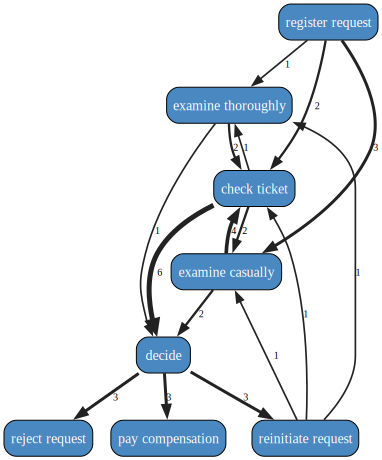

In [5]:
graph = DirectlyFollowsMatrix.graph_representation()
graph